In [ ]:
from sklearn.datasets import fetch_california_housing
data = fetch_california_housing(as_frame=True)
df = data.frame


In [ ]:
import numpy as np
df.info()
df.describe()

med_income = df[['MedInc']]
print("\nFirst five rows of med income :")
print(med_income.head())

pop_lat = df[['Population','Latitude']]
print("\nFirst five rows of population and latitude :")
print(pop_lat.head())

house_age = df[['HouseAge','AveRooms']]
print("\nFirst five rows of house age and average rooms :")
print(house_age.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB

First five rows of med income :
   MedInc
0  8.3252
1  8.3014
2  7.2574
3  5.6431
4  3.8462

First five rows of population and latitude :
   Population  Latitude
0       322.0     37.88
1      2401.0     37.86
2       496.0     37.85
3       558.0     37.85
4       565.0     37.85

First five rows of house age and average rooms :
   HouseAge  AveRooms
0      41.0  6.984127
1      21.0  

Problem 2– Subsetting

 1. Filter houses where MedInc > 8.0, save as high
 income. Display the result.
 2. Filter houses where Latitude > 37, save as north
 california. Display the result.
 3. Filter houses where AveRooms > 6.0 and AveOccup < 2.0, save as spacious
 play the result.

In [ ]:
high_income = df[df['MedInc'] > 8.0]
print("High income")
print(high_income)

north_california = df[df['Latitude'] > 37]
print("\n north california")
print(north_california)

spacious = df[(df['AveRooms'] > 6.0) & (df['AveOccup'] < 2.0)]
print("\n spacious")
print(spacious)




High income
        MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0       8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1       8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
131    11.6017      18.0  8.335052   1.082474       533.0  2.747423     37.84   
134     8.2049      28.0  6.978947   0.968421       463.0  2.436842     37.83   
135     8.4010      26.0  7.530806   1.056872       542.0  2.568720     37.83   
...        ...       ...       ...        ...         ...       ...       ...   
20426  10.0472      11.0  9.890756   1.159664       415.0  3.487395     34.18   
20427   8.6499       4.0  7.236059   1.032528      5495.0  2.553439     34.19   
20428   8.7288       6.0  8.715842   1.102970      3385.0  3.351485     34.23   
20436  12.5420      10.0  9.873315   1.102426      1179.0  3.177898     34.21   
20503   8.2787      27.0  6.935065   1.103896       243.0  3.155844     34.33   

       Longitud

Subsetting Categorical Equivalents:
 1. Create a new column Region based on Latitude values:
 • ’North’ if Latitude > 37
 • ’Central’ if 35 < Latitude ≤ 37
 • ’South’ otherwise
 2. Filter houses where Region is ’North’ or ’Central’, save as north
 result.

In [ ]:
import numpy as np

conditions = [
    df['Latitude'] > 37,
    (df['Latitude'] <= 37) & (df['Latitude'] > 35)
]
choices = ['North', 'Central']

df['Region'] = np.select(conditions, choices, default='South')

north_central_region = df[df['Region'].isin(['North', 'Central'])]
print(north_central_region)


       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  MedHouseVal Region  


 Problem–3
 ExploratoryDataAnalysis:

 Q1. Which house has the highest value per room?

In [ ]:
value_per_room = df['MedHouseVal']/df['AveRooms']
df['valueperroom'] = value_per_room

high_vpr = df[df['valueperroom'] > 1]

high_vpr_sorted = high_vpr.sort_values(by = 'valueperroom', ascending=False)

print(high_vpr_sorted[['MedHouseVal', 'AveRooms', 'valueperroom']].head())

       MedHouseVal  AveRooms  valueperroom
15660      5.00001  1.824719      2.740153
15654      4.50000  1.902087      2.365823
4559       5.00001  2.148148      2.327591
15652      5.00001  2.237474      2.234667
15661      5.00001  2.297872      2.175930


 Q2. Among high-population areas (Population> 5000),which have the highest median income per
 person?

 Hint:

 1.Create a column income per person =MedInc/ Population.
 2. FilterrowswherePopulation> 5000,saveasdenseareas.
 3. Sort dense areas by descending income per person,save as rich_dense_areas.
 4.Display the top 5 rows with MedInc,Population,and income_per_person.

In [ ]:
income_per_person = df['MedInc']/df['Population']
df['income_per_person'] = income_per_person

dense_areas = df[df['Population']> 5000]
rich_dense_areas = dense_areas.sort_values(by = 'income_per_person', ascending=False)

print(rich_dense_areas[['MedInc', 'Population', 'income_per_person']].head())

       MedInc  Population  income_per_person
9004   9.1232      5452.0           0.001673
20427  8.6499      5495.0           0.001574
9027   7.7848      5175.0           0.001504
5724   8.1657      5459.0           0.001496
9013   9.1228      6214.0           0.001468


Problem–4 Group By Exercises:

 Q1. What percent of total house value comes from each Region?
 Hint:
 1.Calculate total MedHouseVal for all houses.

 2.Group by Region and sum MedHouseVal.

 3.Divide each region’s total by the overall total to  get percentage contributions.

In [ ]:
total_value = df['MedHouseVal'].sum()

region_values = df.groupby('Region')['MedHouseVal'].sum()

region_percentages = (region_values / total_value) * 100

print(region_percentages)

Region
Central     5.195671
North      36.267665
South      58.536663
Name: MedHouseVal, dtype: float64


 Q2. What percent of total houses belong to different age groups?
 Hint:
 1.Define AgeGroup based on HouseAge:

 •’New’: HouseAge< 20

 •’Mid’: 20≤HouseAge< 40

 •’Old’: HouseAge≥40

 2.Count total houses.

 3.Group by AgeGroup and count.

 4.Compute percentage shares for each group.

In [ ]:
conditions = [df['HouseAge']<20, (df['HouseAge']>=20) & (df['HouseAge']<40), df['HouseAge']>=40]
choices = ['New', 'Mid', 'Old']

df['AgeGroup'] = np.select(conditions, choices, default='Unknown')
total_houses = len(df)

age_group_counts = df.groupby('AgeGroup').size()

age_group_percentages = (age_group_counts / total_houses) * 100

print(age_group_percentages)

AgeGroup
Mid    51.501938
New    28.236434
Old    20.261628
dtype: float64


 3. Advance Exercises:

 i. Correlation Analysis:

 • Compute Pearson correlation coefficients between MedHouseVal and all other numerical features.

 • Identify which features have the strongest positive and negative correlations with house value.

 • Interpret these relationships.

In [ ]:
numerical_df = df.select_dtypes(include=['number'])

correlation_matrix = numerical_df.corr(method = 'pearson')

medhouseval_correlations = correlation_matrix['MedHouseVal'].sort_values(ascending=False)

strongest_positive_correlation = medhouseval_correlations[1]
strongest_negative_correlation = medhouseval_correlations[-1]

strongest_positive_feature = medhouseval_correlations.index[1]
strongest_negative_feature = medhouseval_correlations.index[-1]


print("Pearson correlation coefficients with MedHouseVal:")
print(medhouseval_correlations)
print("\nStrongest positive correlation with MedHouseVal:")
print(f"Feature: {strongest_positive_feature}, Correlation: {strongest_positive_correlation:.2f}")
print("\nStrongest negative correlation with MedHouseVal:")
print(f"Feature: {strongest_negative_feature}, Correlation: {strongest_negative_correlation:.2f}")



Pearson correlation coefficients with MedHouseVal:
MedHouseVal          1.000000
valueperroom         0.823007
MedInc               0.688075
AveRooms             0.151948
income_per_person    0.114455
HouseAge             0.105623
AveOccup            -0.023737
Population          -0.024650
Longitude           -0.045967
AveBedrms           -0.046701
Latitude            -0.144160
Name: MedHouseVal, dtype: float64

Strongest positive correlation with MedHouseVal:
Feature: valueperroom, Correlation: 0.82

Strongest negative correlation with MedHouseVal:
Feature: Latitude, Correlation: -0.14


/tmp/ipython-input-16-3214532483.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  strongest_positive_correlation = medhouseval_correlations[1]
/tmp/ipython-input-16-3214532483.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  strongest_negative_correlation = medhouseval_correlations[-1]


 2. Handling Missing Data:

 • Randomly set 5% of AveRooms values to NaN (simulate missingness).

 • Impute missing values using median imputation.

 • Visualize and compare distributions of AveRooms before and after imputation using histograms or
 boxplots.

 • Discuss the effect of imputation on data distribution

Number of missing values in 'AveRooms': 1032
Number of missing values in 'AveRooms' after imputation: 0


/tmp/ipython-input-17-990325146.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_missing['AveRooms'].fillna(median_ave_rooms, inplace=True)


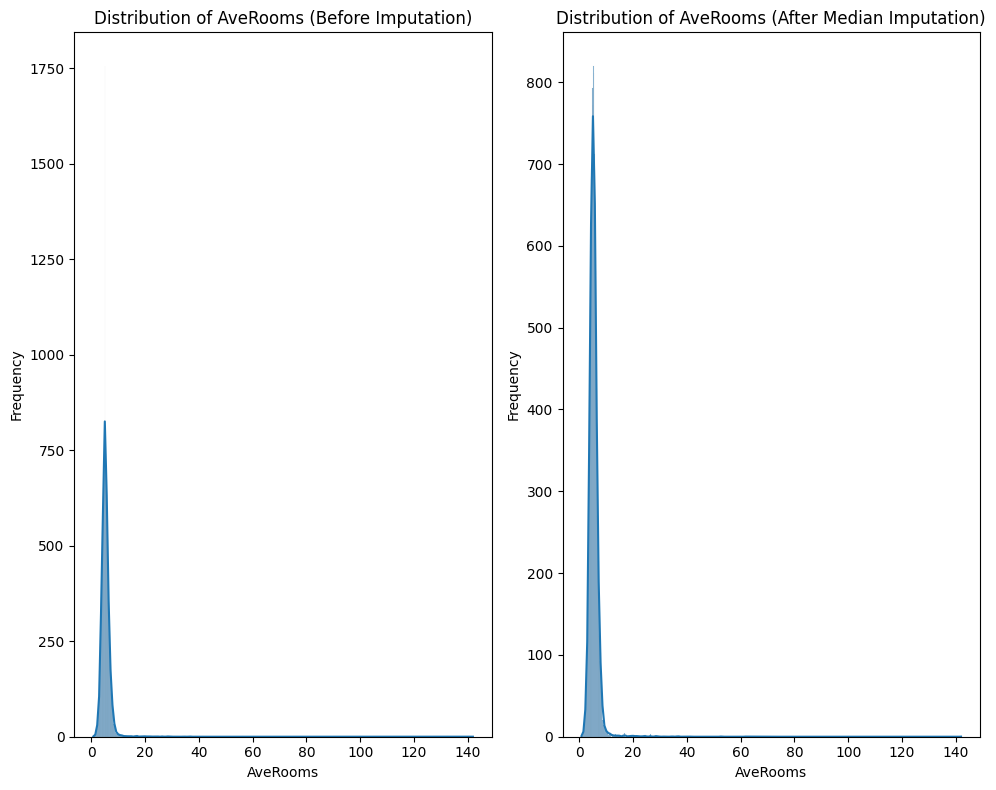

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

df_missing = df.copy()  #to make sure original data is not modified

np.random.seed(42)
missing_indices = np.random.choice(df_missing.index, size=int(0.05 * len(df_missing)), replace=False)
df_missing.loc[missing_indices, 'AveRooms'] = np.nan

print(f"Number of missing values in 'AveRooms': {df_missing['AveRooms'].isnull().sum()}")

median_ave_rooms = df_missing['AveRooms'].median()
df_imputed = df_missing.copy()
df_missing['AveRooms'].fillna(median_ave_rooms, inplace=True)

print(f"Number of missing values in 'AveRooms' after imputation: {df_missing['AveRooms'].isnull().sum()}")

plt.figure(figsize=(10,8))
# Histogram before imputation
plt.subplot(1, 2, 1)
sns.histplot(df_missing['AveRooms'].dropna(), kde=True)
plt.title('Distribution of AveRooms (Before Imputation)')
plt.xlabel('AveRooms')
plt.ylabel('Frequency')

#Histogram after imputation
plt.subplot(1, 2, 2)
sns.histplot(df_imputed['AveRooms'], kde=True)
plt.title('Distribution of AveRooms (After Median Imputation)')
plt.xlabel('AveRooms')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


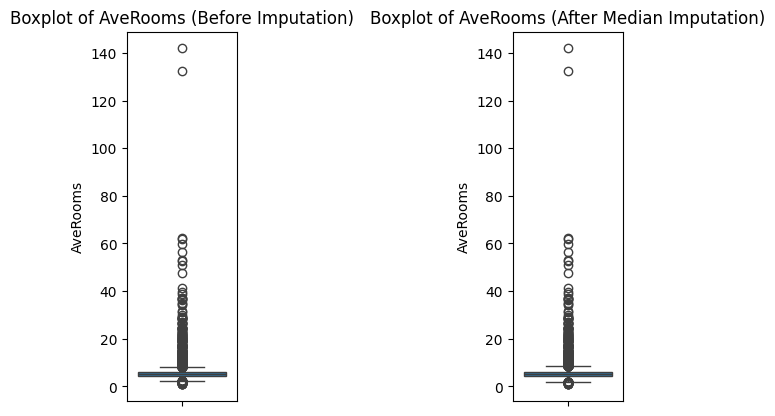

In [ ]:
# Boxplot before imputation
plt.subplot(1, 2, 1)
sns.boxplot(y=df_missing['AveRooms'])
plt.title('Boxplot of AveRooms (Before Imputation)')
plt.ylabel('AveRooms')

# Boxplot after imputation
plt.subplot(1, 2, 2)
sns.boxplot(y=df_imputed['AveRooms'])
plt.title('Boxplot of AveRooms (After Median Imputation)')
plt.ylabel('AveRooms')

plt.subplots_adjust(wspace=2.5)
plt.show()

In [ ]:

# 4. Discuss the effect of imputation on data distribution
print("\nDiscussion on the effect of median imputation on the distribution of AveRooms:")
print(f"Original median of AveRooms (before introducing NaNs): {df['AveRooms'].median():.2f}")
print(f"Median of AveRooms after simulating NaNs: {df_missing['AveRooms'].median():.2f}")
print(f"Median of AveRooms after median imputation: {df_imputed['AveRooms'].median():.2f}")
print("\nAs seen in the histograms and boxplots, filling missing values with the median can introduce a peak or concentration at the median value in the distribution.")
print("The spread of the data might appear slightly narrower in the histogram after imputation compared to the original data (excluding NaNs).")
print("The boxplot after imputation shows the impact on the median and quartiles. While the median remains the same, the whiskers and potential outliers might appear slightly different due to the added imputed values.")
print("Median imputation is a simple method, but it doesn't account for the relationships between 'AveRooms' and other features, which could distort the original data distribution if not used cautiously.")


Discussion on the effect of median imputation on the distribution of AveRooms:
Original median of AveRooms (before introducing NaNs): 5.23
Median of AveRooms after simulating NaNs: 5.23
Median of AveRooms after median imputation: 5.23

As seen in the histograms and boxplots, filling missing values with the median can introduce a peak or concentration at the median value in the distribution.
The spread of the data might appear slightly narrower in the histogram after imputation compared to the original data (excluding NaNs).
The boxplot after imputation shows the impact on the median and quartiles. While the median remains the same, the whiskers and potential outliers might appear slightly different due to the added imputed values.
Median imputation is a simple method, but it doesn't account for the relationships between 'AveRooms' and other features, which could distort the original data distribution if not used cautiously.


4 Exercises on Numpy:
 1. Numpy Foundations- Warm Up Exercises:

 Problem 1– Array Creation:
 1. Create a 1D NumPy array containing integers from 0 to 19.
 2. Reshape it into a 4x5 matrix.
 3. Generate a 5x5 identity matrix and a 3x3 matrix filled with 7.

In [ ]:
import numpy as np
array = np.arange(20)
print(array)

matrix = array.reshape(4,5)
print(matrix)

identity_matrix = np.eye(5)
print(identity_matrix)

matrix_3 = np.full((3,3), 7)
print(matrix_3)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]]
[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]
[[7 7 7]
 [7 7 7]
 [7 7 7]]


 Problem 2– Basic Operations:
 1. Create two 3x3 matrices A and B with random integers (0–9).
 2. Perform:
 • Element-wise addition, multiplication, and division.
 • Matrix multiplication (A @ B).
 3. Compute mean, median, standard deviation, and sum for each matrix

In [ ]:
np.random.seed(42)
matrix_A = np.random.randint(0, 10, size=(3, 3))
matrix_B = np.random.randint(0, 10, size=(3, 3))

print("Matrix A:")
print(matrix_A)
print("\nMatrix B:")
print(matrix_B)

addition = matrix_A + matrix_B
print("\nAddition:")
print(addition)

multiplication = matrix_A * matrix_B
print("\nMultiplication:")
print(multiplication)

division = matrix_A / matrix_B
print("\nDivision:")
print(division)

matrix_multiplication = np.dot(matrix_A, matrix_B)
print("\nMatrix Multiplication (A @ B):")
print(matrix_multiplication)

print("\nFor Matrix A:")
print(f"Mean: {np.mean(matrix_A):.2f}")
print(f"Median: {np.median(matrix_A):.2f}")
print(f"Standard Deviation: {np.std(matrix_A):.2f}")
print(f"Sum: {np.sum(matrix_A)}")

print("\nFor Matrix B:")
print(f"Mean: {np.mean(matrix_B):.2f}")
print(f"Median: {np.median(matrix_B):.2f}")
print(f"Standard Deviation: {np.std(matrix_B):.2f}")
print(f"Sum: {np.sum(matrix_B)}")

Matrix A:
[[6 3 7]
 [4 6 9]
 [2 6 7]]

Matrix B:
[[4 3 7]
 [7 2 5]
 [4 1 7]]

Addition:
[[10  6 14]
 [11  8 14]
 [ 6  7 14]]

Multiplication:
[[24  9 49]
 [28 12 45]
 [ 8  6 49]]

Division:
[[1.5        1.         1.        ]
 [0.57142857 3.         1.8       ]
 [0.5        6.         1.        ]]

Matrix Multiplication (A @ B):
[[ 73  31 106]
 [ 94  33 121]
 [ 78  25  93]]

For Matrix A:
Mean: 5.56
Median: 6.00
Standard Deviation: 2.06
Sum: 50

For Matrix B:
Mean: 4.44
Median: 4.00
Standard Deviation: 2.11
Sum: 40


 Problem 3– Indexing and Slicing:
 1. Slice the first two rows of matrix A.
 2. Select elements greater than 5.
 3. Replace all even numbers in A with-1

In [ ]:
print("Original Matrix A:")
print(matrix_A)

sliced_matrix = matrix_A[:2, :]
print("\nSliced Matrix (First Two Rows):")
print(sliced_matrix)

elements_greater_than_5 = matrix_A[matrix_A > 5]
print("\nElements Greater Than 5:")
print(elements_greater_than_5)

matrix_A[matrix_A % 2 == 0] = -1
print("\nMatrix A with even numbers replaced by -1:")
print(matrix_A)

Original Matrix A:
[[6 3 7]
 [4 6 9]
 [2 6 7]]

Sliced Matrix (First Two Rows):
[[6 3 7]
 [4 6 9]]

Elements Greater Than 5:
[6 7 6 9 6 7]

Matrix A with even numbers replaced by -1:
[[-1  3  7]
 [-1 -1  9]
 [-1 -1  7]]


 2. Numpy: Advanced Exercises:

 1. Broadcasting Challenge

 • Create a 3x1 column vector and a 1x4 row vector.

 • Use broadcasting to generate a 3x4 multiplication table.

In [ ]:
column_vector = np.array([[0],[1],[2]])
print("Column Vector (3x1):")
print(column_vector)

row_vector = np.array([[0, 1, 2, 3]])
print("\nRow Vector (1x4):")
print(row_vector)

multiplication_table = column_vector * row_vector
print("\nMultiplication Table (3x4):")
print(multiplication_table)


Column Vector (3x1):
[[0]
 [1]
 [2]]

Row Vector (1x4):
[[0 1 2 3]]

Multiplication Table (3x4):
[[0 0 0 0]
 [0 1 2 3]
 [0 2 4 6]]


 2. Vectorization vs Loops

 • Write a function to compute element-wise square of an array using:– a for-loop– NumPy vectorized operation

 • Compare their execution time using %%timeit or time module.

In [ ]:

import numpy as np
import timeit

def square_with_loop(arr):
  result = np.empty_like(arr)
  for i in range(arr.shape[0]):
    if arr.ndim > 1:
      for j in range(arr.shape[1]):
        result[i, j] = arr[i, j] ** 2
    else:
      result[i] = arr[i] ** 2
  return result

def square_with_vectorization(arr):
  return arr ** 2

sample_array = np.random.rand(1000, 1000)

loop_time = timeit.timeit('square_with_loop(sample_array)', setup='from __main__ import square_with_loop, sample_array', number=10)
vectorized_time = timeit.timeit('square_with_vectorization(sample_array)', setup='from __main__ import square_with_vectorization, sample_array', number=10)

print(f"Execution time with loop: {loop_time:.6f} seconds")
print(f"Execution time with vectorization: {vectorized_time:.6f} seconds")



Execution time with loop: 3.958255 seconds
Execution time with vectorization: 0.012459 seconds


 3. Simulation Task

 • Simulate 1000 random coin tosses and calculate proportion of heads.

 • Simulate 1000 dice rolls and plot histogram of outcomes.

Proportion of heads in 1000 coin tosses: 48.80%


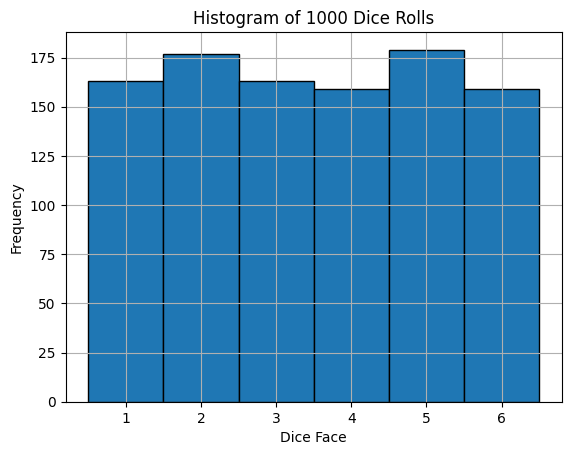

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

tosses = np.random.randint(0, 2, size=1000)
proportion_heads = np.mean(tosses)
print(f"Proportion of heads in 1000 coin tosses: {proportion_heads:.2%}")


rolls = np.random.randint(1, 7, size=1000)

plt.hist(rolls, bins=np.arange(1, 8) - 0.5, edgecolor='black')
plt.title('Histogram of 1000 Dice Rolls')
plt.xlabel('Dice Face')
plt.ylabel('Frequency')
plt.xticks(range(1, 7))
plt.grid(True)
plt.show()


4. Solving Systems of Equations

 • Solve the system:
 3x +y =9
 x+2y =8

 • Use np.linalg.solve to find the solution

In [ ]:
import numpy as np
A = np.array([[3, 1], [1, 2]])
B = np.array([9, 8])

solution = np.linalg.solve(A, B)
print(f"Solution: x = {solution[0]}, y = {solution[1]}")

Solution: x = 2.0, y = 3.0


 5 Exercises on Visualization with Matplotlib or Seaborn:

 Problem 1– Basic Plotting with Matplotlib

 1. Generate a line plot of the function y = sin(x) over the interval [0,2π].
 2. Customize the plot with title, axis labels, and grid.
 3. Save the plot to a file.

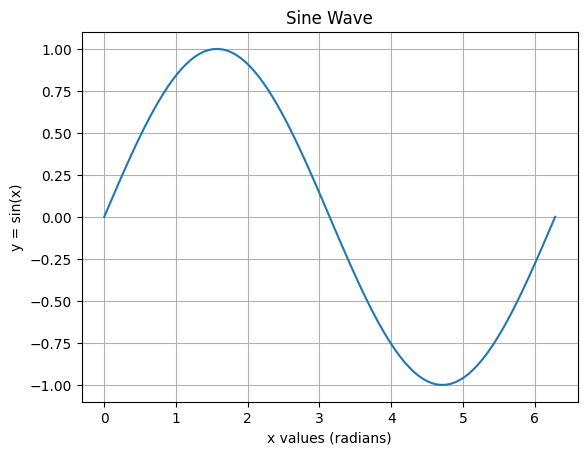

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 2 * np.pi, 100)
y = np.sin(x)

plt.plot(x, y)
plt.title('Sine Wave')
plt.xlabel('x values (radians)')
plt.ylabel('y = sin(x)')
plt.grid(True)
plt.show()


 Problem 2– Histograms and Bar Plots

 1. Plot a histogram of the MedHouseVal column from the California dataset.

 2. Create a bar chart comparing average MedInc across Region.

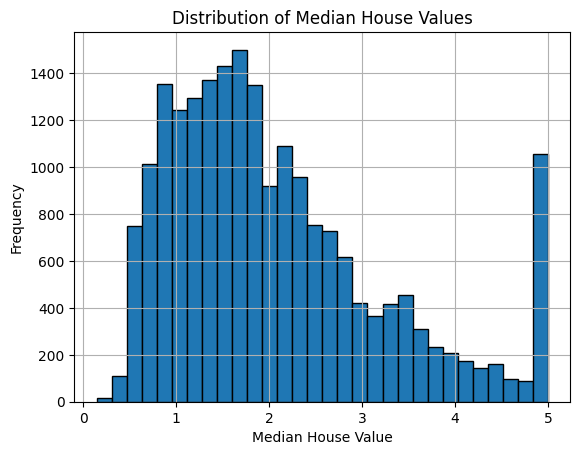

In [ ]:
import matplotlib.pyplot as plt

df['MedHouseVal'].hist(bins=30, edgecolor='black')
plt.title('Distribution of Median House Values')
plt.xlabel('Median House Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


 Problem 3– Scatter Plots
 1. Create a scatter plot of MedInc vs. MedHouseVal.
 2. Color the points by Region and add transparency.
 3. Add a regression line using Seaborn’s regplot

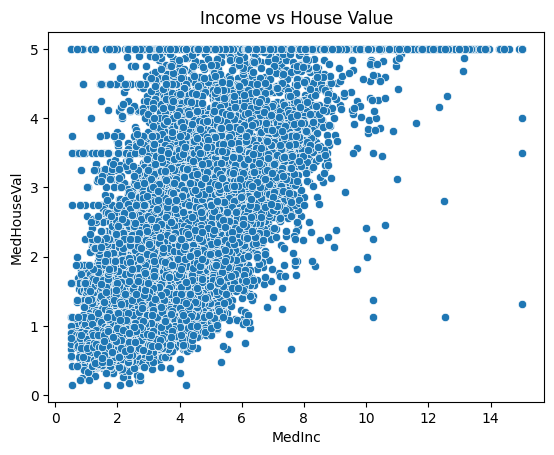

<Axes: xlabel='MedInc', ylabel='MedHouseVal'>

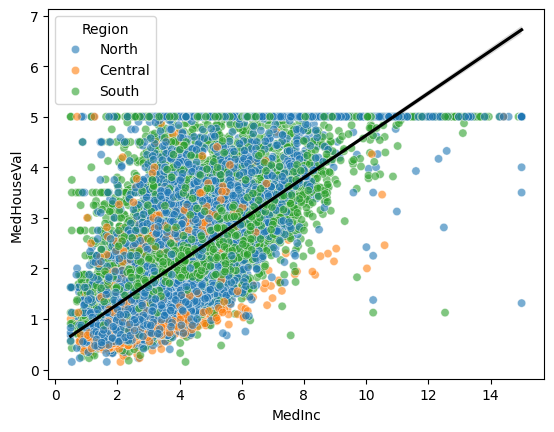

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=df, x='MedInc', y='MedHouseVal')
plt.title('Income vs House Value')
plt.show()
sns.scatterplot(data=df, x='MedInc', y='MedHouseVal',
                hue='Region', alpha=0.6)
sns.regplot(data=df, x='MedInc', y='MedHouseVal',
            scatter=False, color='black')


 Problem 4– Subplots
 1. Create a 2x2 subplot grid showing:

 • Line plot of sine

 • Histogram of income

 • Bar chart of region-wise population

 • Boxplot of house value grouped by age group

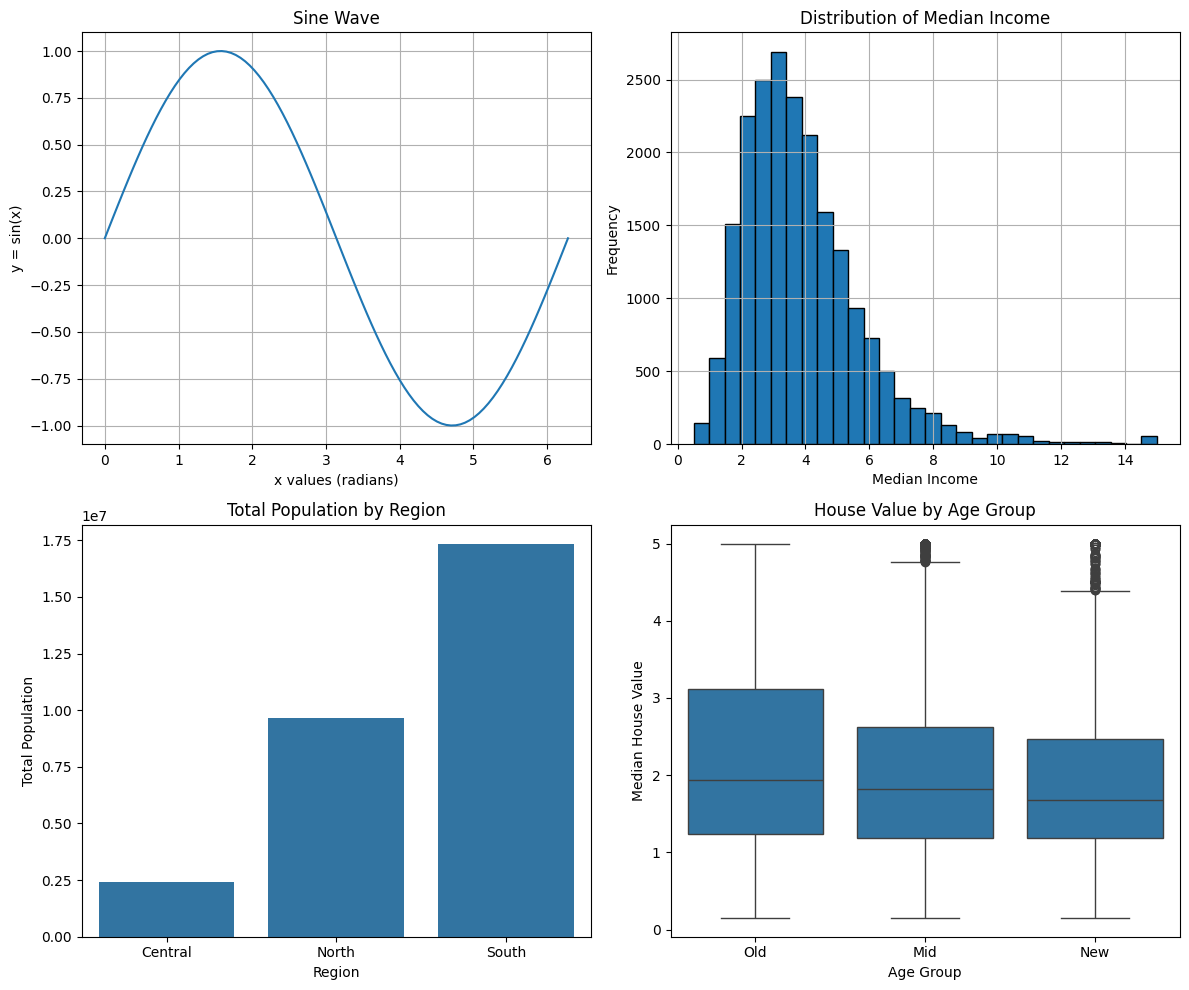

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

x = np.linspace(0, 2 * np.pi, 100)
y = np.sin(x)

fig, axs = plt.subplots(2, 2, figsize=(12, 10))

axs[0, 0].plot(x, y)
axs[0, 0].set_title('Sine Wave')
axs[0, 0].set_xlabel('x values (radians)')
axs[0, 0].set_ylabel('y = sin(x)')
axs[0, 0].grid(True)

axs[0, 1].hist(df['MedInc'], bins=30, edgecolor='black')
axs[0, 1].set_title('Distribution of Median Income')
axs[0, 1].set_xlabel('Median Income')
axs[0, 1].set_ylabel('Frequency')
axs[0, 1].grid(True)

region_population = df.groupby('Region')['Population'].sum().reset_index()
sns.barplot(ax=axs[1, 0], x='Region', y='Population', data=region_population)
axs[1, 0].set_title('Total Population by Region')
axs[1, 0].set_xlabel('Region')
axs[1, 0].set_ylabel('Total Population')

sns.boxplot(ax=axs[1, 1], x='AgeGroup', y='MedHouseVal', data=df)
axs[1, 1].set_title('House Value by Age Group')
axs[1, 1].set_xlabel('Age Group')
axs[1, 1].set_ylabel('Median House Value')

plt.tight_layout()
plt.show()


 2. Advanced Exercise: Visualization

 1. Heatmaps

 • Compute the correlation matrix of the California dataset.

 • Plot a heatmap using sns.heatmap with annotations.

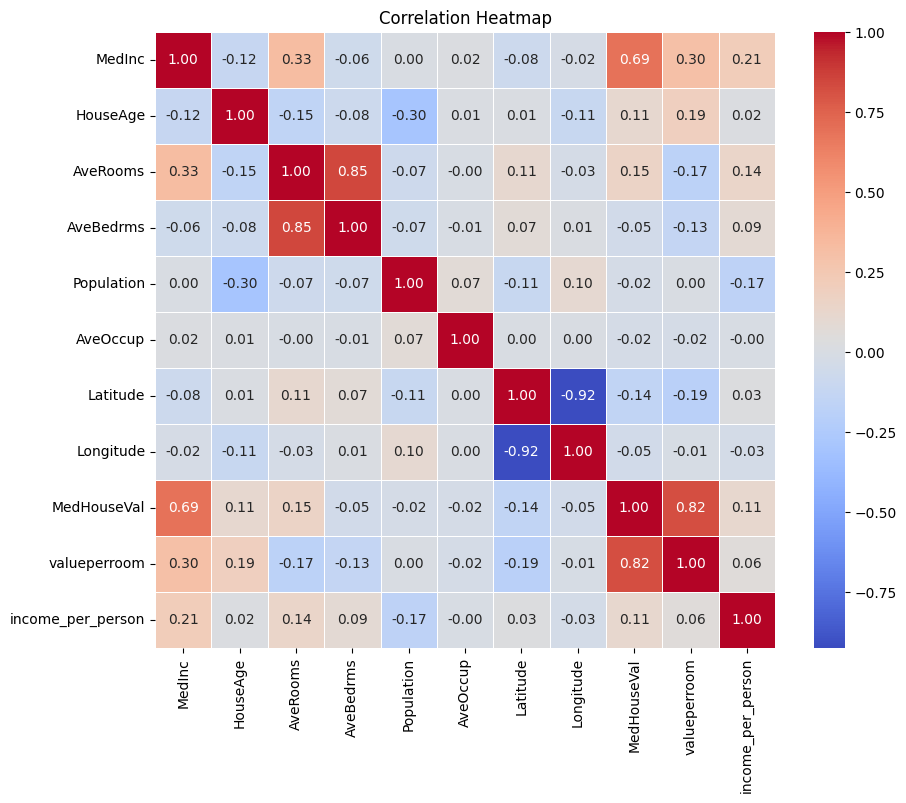

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

 2. Pairplot

 • Use Seaborn’s pairplot to show pairwise relationships between MedInc, MedHouseVal, HouseAge,
 and AveRooms.

 • Color points by Region

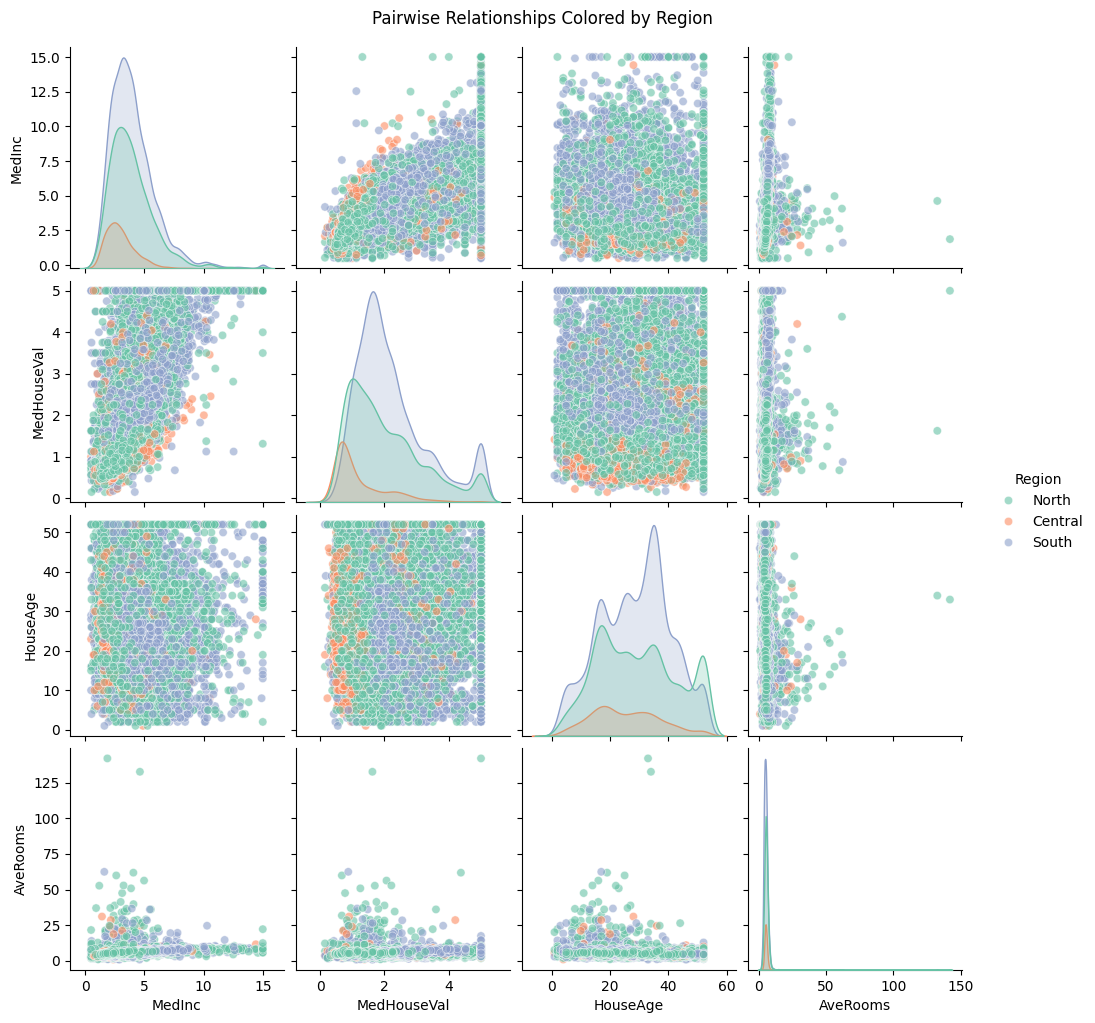

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pairplot with region-based color coding
sns.pairplot(df, vars=['MedInc', 'MedHouseVal', 'HouseAge', 'AveRooms'],
             hue='Region', palette='Set2', plot_kws={'alpha': 0.6})

plt.suptitle('Pairwise Relationships Colored by Region', y=1.02)
plt.show()


Distribution Analysis

• Use Seaborn’s distplot or displot to visualize:

– Distribution of MedHouseVal

– Log-transformed version to see skewness reduction

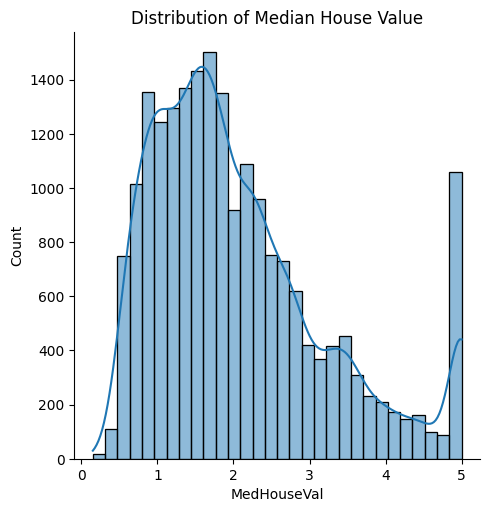

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Raw distribution
sns.displot(df['MedHouseVal'], kde=True, bins=30)
plt.title('Distribution of Median House Value')
plt.xlabel('MedHouseVal')
plt.show()


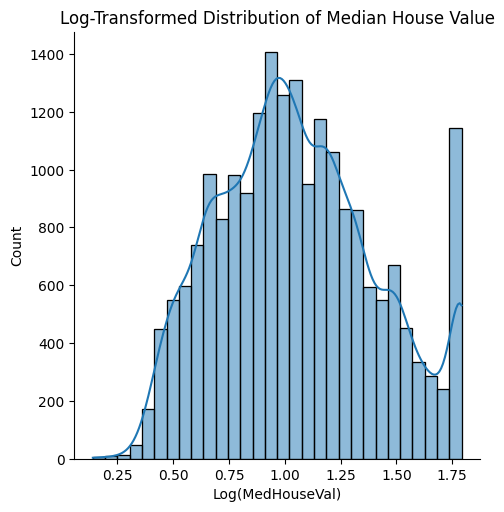

In [ ]:
import numpy as np

# Log-transform and plot
df['LogMedHouseVal'] = np.log1p(df['MedHouseVal'])  # log1p handles zero values safely

sns.displot(df['LogMedHouseVal'], kde=True, bins=30)
plt.title('Log-Transformed Distribution of Median House Value')
plt.xlabel('Log(MedHouseVal)')
plt.show()
